In [23]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

import modutils

data_dir = '../DataSets/Churn/'

In [2]:
src = pd.read_csv(data_dir + 'user_logs.csv', nrows=100000)

In [81]:
src['flg_neg'] = 1.0*(src.total_secs < 0)
src['num_total'] = src.num_25 + src.num_50 + src.num_75 + src.num_985 + src.num_100
src['pct_25'] = src.num_25 / src.num_total
src['pct_50'] = src.num_50 / src.num_total
src['pct_75'] = src.num_75 / src.num_total
src['pct_985'] = src.num_985 / src.num_total
src['pct_100'] = src.num_100 / src.num_total
src['avg_sec'] = np.maximum(0, np.array(src.total_secs / src.num_total))
src['avg_sec_song'] = np.maximum(0, np.array(src.total_secs / (src.num_25/0.25 + src.num_50/0.50 + src.num_75/0.75 + src.num_985/0.985 + src.num_100)))

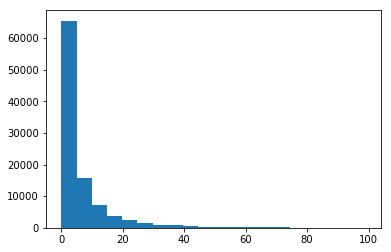

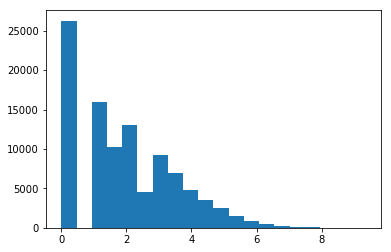

In [38]:
plt.hist(src.num_25[src.num_25 < 100], bins=20)
plt.show()
plt.hist(np.log2(1 + src.num_25), bins=20)
plt.show()

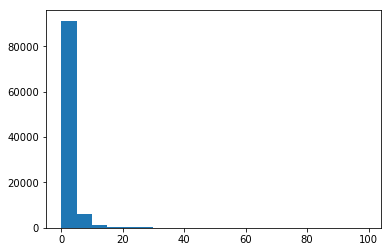

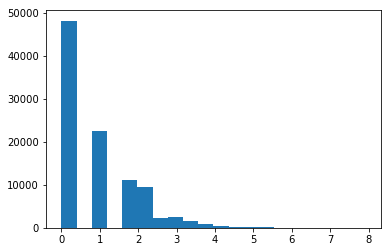

In [39]:
plt.hist(src.num_50[src.num_50 < 100], bins=20)
plt.show()
plt.hist(np.log2(1 + src.num_50), bins=20)
plt.show()

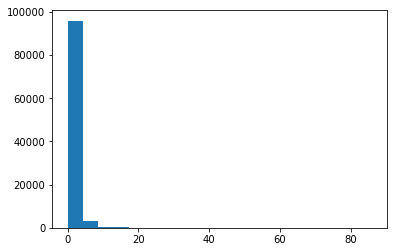

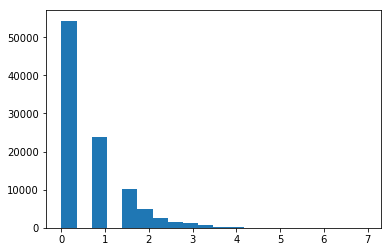

In [40]:
plt.hist(src.num_75[src.num_75 < 100], bins=20)
plt.show()
plt.hist(np.log2(1 + src.num_75), bins=20)
plt.show()

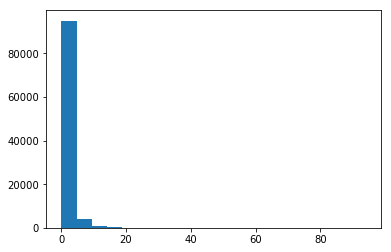

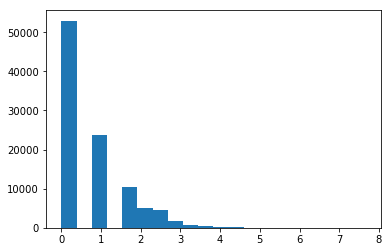

In [41]:
plt.hist(src.num_985[src.num_985 < 100], bins=20)
plt.show()
plt.hist(np.log2(1 + src.num_985), bins=20)
plt.show()

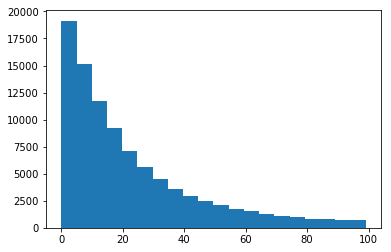

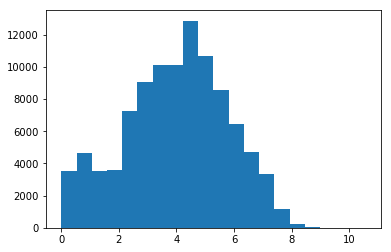

In [42]:
plt.hist(src.num_100[src.num_100 < 100], bins=20)
plt.show()
plt.hist(np.log2(1 + src.num_100), bins=20)
plt.show()

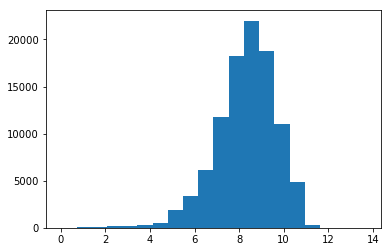

In [49]:
plt.hist(np.log(1 + src.total_secs[src.total_secs>0]), bins=20)
plt.show()

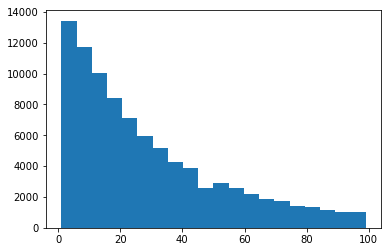

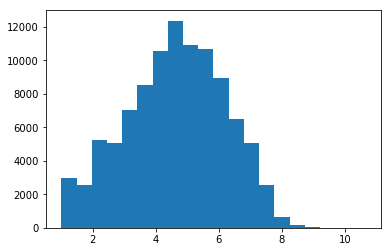

In [52]:
plt.hist(src.num_total[src.num_total < 100], bins=20)
plt.show()
plt.hist(np.log2(1 + src.num_total), bins=20)
plt.show()

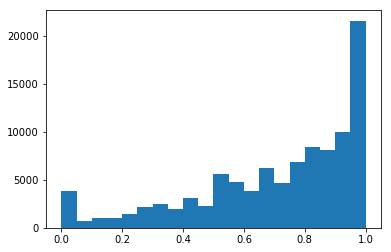

In [59]:
plt.hist(src.pct_100, bins=20)
plt.show()

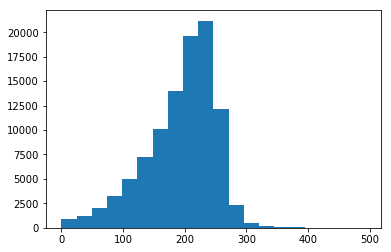

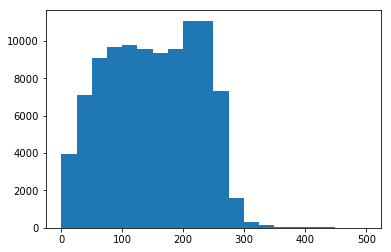

In [82]:
plt.hist(src.avg_sec[src.avg_sec < 500], bins=20)
plt.show()
plt.hist(src.avg_sec_song[src.avg_sec_song < 500], bins=20)
plt.show()

In [87]:
src[src.num_25 < src.num_100 ].describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,flg_neg,num_total,pct_25,pct_50,pct_75,pct_985,pct_100,avg_sec,avg_sec_song
count,8.443100e+04,84431.000000,84431.000000,84431.000000,84431.000000,84431.000000,84431.000000,8.443100e+04,84431.000000,84431.000000,84431.000000,84431.000000,84431.000000,84431.000000,84431.000000,84431.000000,84431.000000
mean,2.015721e+07,4.519063,1.318378,0.909571,1.095119,34.956994,30.938293,-1.857106e+12,0.000201,42.799126,0.108508,0.037259,0.026921,0.031457,0.795856,213.483696,171.208914
std,6.192154e+03,7.552739,2.720091,1.741103,2.740083,43.442098,33.548550,1.308646e+14,0.014188,48.018494,0.115353,0.066788,0.052541,0.062440,0.178282,193.956664,131.910749
min,2.015010e+07,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-9.223372e+15,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000
25%,2.015080e+07,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,2.419681e+03,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.666667,185.012347,115.742796
50%,2.016030e+07,2.000000,0.000000,0.000000,0.000000,20.000000,20.000000,5.435830e+03,0.000000,27.000000,0.071429,0.000000,0.000000,0.000000,0.833333,215.425714,171.641379
75%,2.016090e+07,6.000000,2.000000,1.000000,1.000000,44.000000,41.000000,1.154426e+04,0.000000,56.000000,0.181818,0.050000,0.036036,0.040000,0.952381,239.517544,223.428284
max,2.017023e+07,158.000000,147.000000,123.000000,202.000000,1524.000000,929.000000,8.725379e+05,1.000000,1611.000000,0.487500,0.833333,0.800000,0.982456,1.000000,51964.562583,30667.610705


In [88]:
src.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,flg_neg,num_total,pct_25,pct_50,pct_75,pct_985,pct_100,avg_sec,avg_sec_song
count,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.015719e+07,6.44665,1.633800,1.008100,1.142000,30.731330,30.049310,-1.844674e+12,0.000200,40.961880,0.171242,0.050989,0.033252,0.038121,0.706397,195.771021,151.371464
std,6.186828e+03,13.69953,4.203367,2.017334,2.851736,41.392629,33.840801,1.304258e+14,0.014141,47.661174,0.202224,0.102806,0.074955,0.088033,0.272581,183.862457,130.538073
min,2.015010e+07,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.223372e+15,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.015080e+07,0.00000,0.000000,0.000000,0.000000,6.000000,8.000000,1.892896e+03,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.540541,162.354228,87.386955
50%,2.016023e+07,2.00000,1.000000,0.000000,0.000000,17.000000,19.000000,4.627589e+03,0.000000,25.000000,0.101609,0.009615,0.000000,0.000000,0.777778,206.124143,151.548544
75%,2.016090e+07,7.00000,2.000000,1.000000,1.000000,38.000000,39.000000,1.020201e+04,0.000000,54.000000,0.257371,0.062500,0.041667,0.044444,0.933333,235.043888,215.636613
max,2.017023e+07,653.00000,241.000000,123.000000,202.000000,1524.000000,929.000000,8.725379e+05,1.000000,1611.000000,1.000000,1.000000,1.000000,1.000000,1.000000,51964.562583,30667.610705


In [89]:
srct = pd.read_csv(data_dir + 'transactions.csv', nrows=100000)

In [96]:
srct[(srct.payment_plan_days <= 0)].describe() #4%

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,4049.000000,4049.0,4049.0,4049.000000,4049.000000,4.049000e+03,4.049000e+03,4049.000000
mean,35.890837,0.0,0.0,152.880958,0.932576,2.015060e+07,2.015088e+07,0.021734
std,4.698776,0.0,0.0,97.473918,0.250786,2.100880e+02,1.412149e+03,0.145831
min,13.000000,0.0,0.0,0.000000,0.000000,2.015033e+07,2.015022e+07,0.000000
25%,33.000000,0.0,0.0,149.000000,1.000000,2.015043e+07,2.015060e+07,0.000000
50%,34.000000,0.0,0.0,149.000000,1.000000,2.015051e+07,2.015061e+07,0.000000
75%,40.000000,0.0,0.0,149.000000,1.000000,2.015073e+07,2.015093e+07,0.000000
max,41.000000,0.0,0.0,1788.000000,1.000000,2.015103e+07,2.017033e+07,1.000000


In [97]:
srct[(srct.payment_plan_days < 30) & (srct.payment_plan_days > 0)].describe() #3%

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,2866.000000,2866.000000,2866.000000,2866.000000,2866.0,2.866000e+03,2.866000e+03,2866.0
mean,35.306699,7.205862,0.556525,0.556525,0.0,2.015720e+07,2.015768e+07,0.0
std,1.226726,1.110090,4.828195,4.828195,0.0,5.037087e+03,5.008517e+03,0.0
min,26.000000,1.000000,0.000000,0.000000,0.0,2.015020e+07,2.015030e+07,0.0
25%,35.000000,7.000000,0.000000,0.000000,0.0,2.015061e+07,2.015062e+07,0.0
50%,35.000000,7.000000,0.000000,0.000000,0.0,2.016072e+07,2.016083e+07,0.0
75%,35.000000,7.000000,0.000000,0.000000,0.0,2.016103e+07,2.016111e+07,0.0
max,38.000000,21.000000,105.000000,105.000000,0.0,2.017022e+07,2.017033e+07,0.0


In [99]:
srct[(srct.payment_plan_days < 31) & (srct.payment_plan_days >= 30)].describe() #88% =30days

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,88053.000000,88053.0,88053.000000,88053.000000,88053.000000,8.805300e+04,8.805300e+04,88053.000000
mean,39.336684,30.0,135.791501,131.077726,0.885069,2.015830e+07,2.015937e+07,0.042679
std,3.106476,0.0,23.241860,32.227491,0.318940,6.065516e+03,6.418715e+03,0.202133
min,7.000000,30.0,0.000000,0.000000,0.000000,2.015010e+07,2.005113e+07,0.000000
25%,39.000000,30.0,99.000000,99.000000,1.000000,2.015110e+07,2.015120e+07,0.000000
50%,41.000000,30.0,149.000000,149.000000,1.000000,2.016042e+07,2.016053e+07,0.000000
75%,41.000000,30.0,149.000000,149.000000,1.000000,2.016100e+07,2.016111e+07,0.000000
max,41.000000,30.0,180.000000,180.000000,1.000000,2.017023e+07,2.017033e+07,1.000000


In [100]:
srct[(srct.payment_plan_days < 32) & (srct.payment_plan_days >= 31)].describe() #3% 31 days

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,3452.000000,3452.0,3452.0,3452.000000,3452.0,3.452000e+03,3.452000e+03,3452.000000
mean,38.704519,31.0,149.0,145.978563,1.0,2.015025e+07,2.015037e+07,0.039108
std,2.487675,0.0,0.0,21.004590,0.0,1.057796e+02,1.909830e+02,0.193879
min,11.000000,31.0,149.0,0.000000,1.0,2.015010e+07,2.014123e+07,0.000000
25%,39.000000,31.0,149.0,149.000000,1.0,2.015013e+07,2.015031e+07,0.000000
50%,39.000000,31.0,149.0,149.000000,1.0,2.015023e+07,2.015040e+07,0.000000
75%,40.000000,31.0,149.0,149.000000,1.0,2.015033e+07,2.015050e+07,0.000000
max,40.000000,31.0,149.0,149.000000,1.0,2.015052e+07,2.015102e+07,1.000000


In [112]:
srct[(srct.payment_plan_days < 200) & (srct.payment_plan_days >= 32)].describe() #180-200 1%

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.0,1.052000e+03,1.052000e+03,1052.0
mean,31.057034,164.500951,685.878327,685.878327,0.0,2.015636e+07,2.015900e+07,0.0
std,7.201899,44.249348,231.505918,231.505918,0.0,5.278165e+03,2.903833e+04,0.0
min,3.000000,35.000000,0.000000,0.000000,0.0,2.015010e+07,1.970010e+07,0.0
25%,29.000000,120.000000,480.000000,480.000000,0.0,2.015081e+07,2.016020e+07,0.0
50%,32.000000,180.000000,799.000000,799.000000,0.0,2.016020e+07,2.016073e+07,0.0
75%,38.000000,195.000000,894.000000,894.000000,0.0,2.016063e+07,2.016121e+07,0.0
max,38.000000,195.000000,894.000000,894.000000,0.0,2.017023e+07,2.017033e+07,0.0


In [118]:
srct[ (srct.payment_plan_days >= 201)].describe() #almost no 1-year 0.5%

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,498.000000,498.000000,498.000000,498.000000,498.0,4.980000e+02,4.980000e+02,498.0
mean,31.403614,403.042169,1651.036145,1651.036145,0.0,2.015273e+07,2.016337e+07,0.0
std,7.147747,23.167925,381.946169,381.946169,0.0,4.288120e+03,4.623333e+03,0.0
min,2.000000,240.000000,0.000000,0.000000,0.0,2.015010e+07,2.015020e+07,0.0
25%,32.000000,410.000000,1788.000000,1788.000000,0.0,2.015035e+07,2.016051e+07,0.0
50%,32.000000,410.000000,1788.000000,1788.000000,0.0,2.015083e+07,2.016101e+07,0.0
75%,38.000000,410.000000,1788.000000,1788.000000,0.0,2.015122e+07,2.017011e+07,0.0
max,38.000000,450.000000,1788.000000,1788.000000,0.0,2.017023e+07,2.017033e+07,0.0


In [119]:
srct[(srct.payment_plan_days < 32) & (srct.payment_plan_days >= 28)].describe() #91.5%

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,91505.000000,91505.000000,91505.000000,91505.000000,91505.000000,9.150500e+04,9.150500e+04,91505.000000
mean,39.312835,30.037725,136.289787,131.639856,0.889405,2.015800e+07,2.015903e+07,0.042544
std,3.087724,0.190531,22.937719,32.002016,0.313632,6.144411e+03,6.525593e+03,0.201828
min,7.000000,30.000000,0.000000,0.000000,0.000000,2.015010e+07,2.005113e+07,0.000000
25%,39.000000,30.000000,100.000000,99.000000,1.000000,2.015100e+07,2.015111e+07,0.000000
50%,41.000000,30.000000,149.000000,149.000000,1.000000,2.016041e+07,2.016051e+07,0.000000
75%,41.000000,30.000000,149.000000,149.000000,1.000000,2.016093e+07,2.016110e+07,0.000000
max,41.000000,31.000000,180.000000,180.000000,1.000000,2.017023e+07,2.017033e+07,1.000000


In [123]:
srct[(srct.payment_plan_days >= 0) & (srct.payment_plan_days < 28)].describe() #91.5%

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,6915.000000,6915.000000,6915.000000,6915.000000,6915.000000,6.915000e+03,6.915000e+03,6915.000000
mean,35.648735,2.986551,0.230658,89.748373,0.546059,2.015334e+07,2.015370e+07,0.012726
std,3.692274,3.621277,3.120080,105.849497,0.497910,4.592202e+03,4.775271e+03,0.112097
min,13.000000,0.000000,0.000000,0.000000,0.000000,2.015020e+07,2.015022e+07,0.000000
25%,34.000000,0.000000,0.000000,0.000000,0.000000,2.015051e+07,2.015061e+07,0.000000
50%,35.000000,0.000000,0.000000,149.000000,1.000000,2.015063e+07,2.015083e+07,0.000000
75%,38.000000,7.000000,0.000000,149.000000,1.000000,2.016022e+07,2.016032e+07,0.000000
max,41.000000,21.000000,105.000000,1788.000000,1.000000,2.017022e+07,2.017033e+07,1.000000


In [126]:
tmp = src.date[3]

numpy.int64